# Table of Contents
 <p>

In [125]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import epistasis as epi
import scipy.stats as stats

from matplotlib import rc

import os
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})


%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [126]:
genotypes = ['N2', 'let-23(sa62)', 'let-23(sa62)/+', 'sy622', 'sy665', 'let-23(sa62)/+; sy622', 
             'let-23(sa62)/+; sy665', 'let-23(sa62)/+; dpy-4(e1166)', 'let-60(n1046)',
             'let-60(n1046)/+', 'let-60(n1046)/+; sy622', 'lin-3(n378)', 'lin-3(n378); sy622',
             'lin-3(n378); sy665', 'let-23(sy1)', 'let-23(sy1); sy662', 'let-23(sy1); sy665']
vul = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, .96, .84, .78, .100, .75, .62], dtype=float)
p6p = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, .35, .86, .76, .29, .90, .90], dtype=float)
muv = np.array([0, .98, .4, .3, .2, .96, .95, .15, .73, .4, .91, 0, 0, 0, 0, 0, .5], dtype=float)
vpc_mean = np.array([3, 4.3, 3.1, 3.0, 3.0, 4.9, 4.1, 3.1, 4.0, 3.1, 4.2, 0.7, 1.6, 1.6, 0.5, 2.1, 2.3], dtype=float)
vpc_error = np.array([0, .6, .3, .2, 0, .8, .7, .2, .8, .4, .8, 1, .9, 1, .9, .9, .8], dtype=float)
n = np.array([31, 42, 26, 35, 50, 23, 20, 26, 22, 24, 23, 51, 37, 45, 24, 20, 21], dtype=int)

data = np.vstack((genotypes, vul, p6p, muv, vpc_mean, vpc_error, n))
columns = ['genotype', 'Vul', 'P6.p induction', 'Muv', 'VPC induction', 'VPC error', 'n']
data = pd.DataFrame(data.T, columns=columns)
data[columns[1:]] = data[columns[1:]].apply(pd.to_numeric)


In [153]:
def t_statistic(meana, meanb, sa, sb, na, nb):
    """
    Returns a t-statistic.
    params:
    -------
    meana, meanb - mean of the sampels
    sa, sb - standard deviation of the samples
    na, nb - number of individuals tested in each group
    """
    harmonic = np.sqrt(sa**2/na + sb**2/nb)
    delta_mean = (meana - meanb)
    return delta_mean/harmonic

def t_test(meana, meanb, sa, sb, na, nb):
    """Returns a p-value from a student t-test."""
    n = na + nb -2
    t = t_statistic(meana, meanb, sa, sb, na, nb)
    df = (sa**2/na + sb**2/nb)**2/((sa**2/na)**2/(na-1) + (sb**2/nb)/(nb-1))
    return stats.t.sf(t, df)

In [154]:
comparisons = {'let-23(sa62)/+; sy622': 'let-23(sa62)/+',
               'let-23(sa62)/+; sy665': 'let-23(sa62)/+',
               'let-23(sa62)/+; dpy-4(e1166)': 'let-23(sa62)/+',
               'let-60(n1046)/+; sy622': 'let-60(n1046)',
               'lin-3(n378); sy622': 'lin-3(n378)',
               'lin-3(n378); sy665': 'lin-3(n378)',
               'let-23(sy1); sy662': 'let-23(sy1)',
               'let-23(sy1); sy665': 'let-23(sy1)'
              }

In [156]:
for key, value in comparisons.items():
    meanExp = data[data.genotype == key]['VPC induction'].values[0]
    sdExp = data[data.genotype == key]['VPC error'].values[0]
    nExp = data[data.genotype == key].n.values[0]
    
    meanCon = data[data.genotype == value]['VPC induction'].values[0]
    sdCon = data[data.genotype == value]['VPC error'].values[0]
    nCon = data[data.genotype == value].n.values[0]
    t_stat = t_test(meanExp, meanCon, sdExp, sdCon, nExp, nCon)
    print('{0}, compared to {1}: pval={2:.2g}'.format(key, value, t_stat))

let-60(n1046)/+; sy622, compared to let-60(n1046): pval=0.24
let-23(sy1); sy665, compared to let-23(sy1): pval=0.0039
let-23(sa62)/+; dpy-4(e1166), compared to let-23(sa62)/+: pval=0.5
lin-3(n378); sy665, compared to lin-3(n378): pval=0.0049
let-23(sy1); sy662, compared to let-23(sy1): pval=0.003
let-23(sa62)/+; sy622, compared to let-23(sa62)/+: pval=3.9e-05
lin-3(n378); sy622, compared to lin-3(n378): pval=0.005
let-23(sa62)/+; sy665, compared to let-23(sa62)/+: pval=0.0012


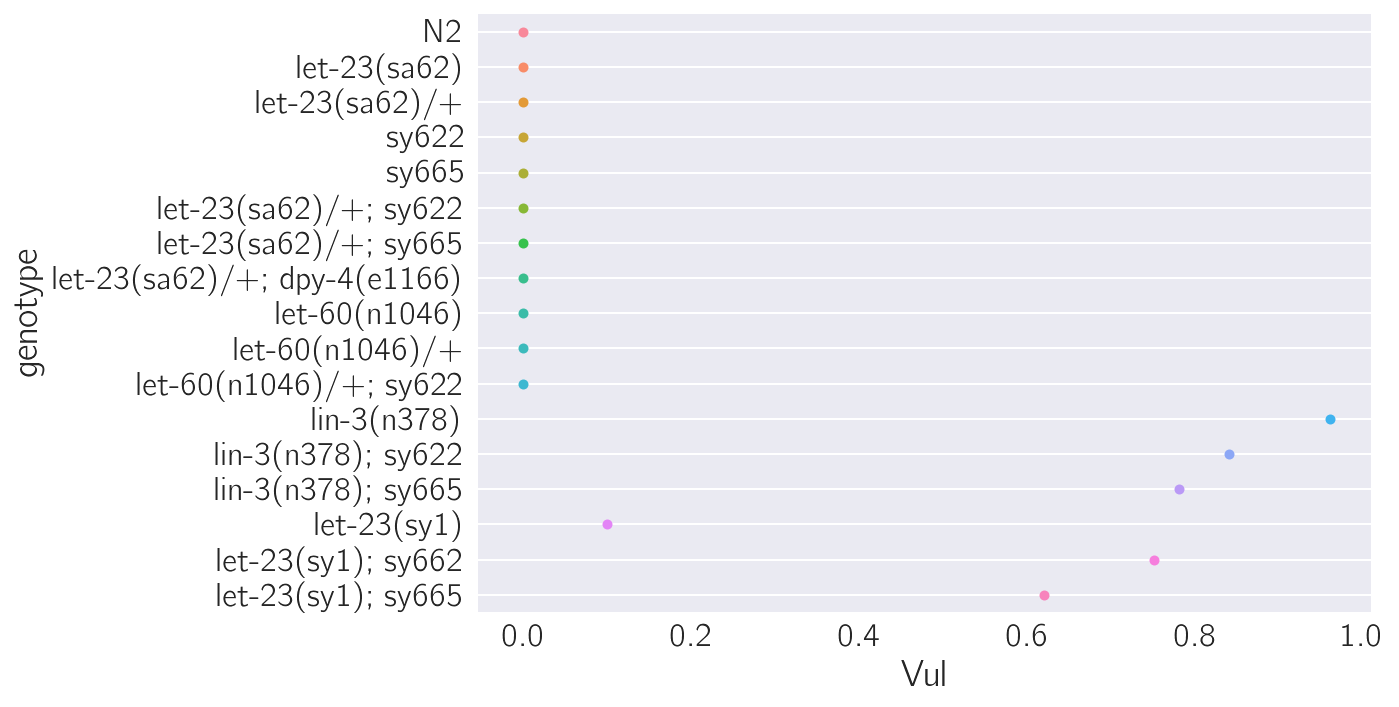

In [130]:
ax = sns.swarmplot('Vul', 'genotype', data=data)
ax.yaxis.grid(True)

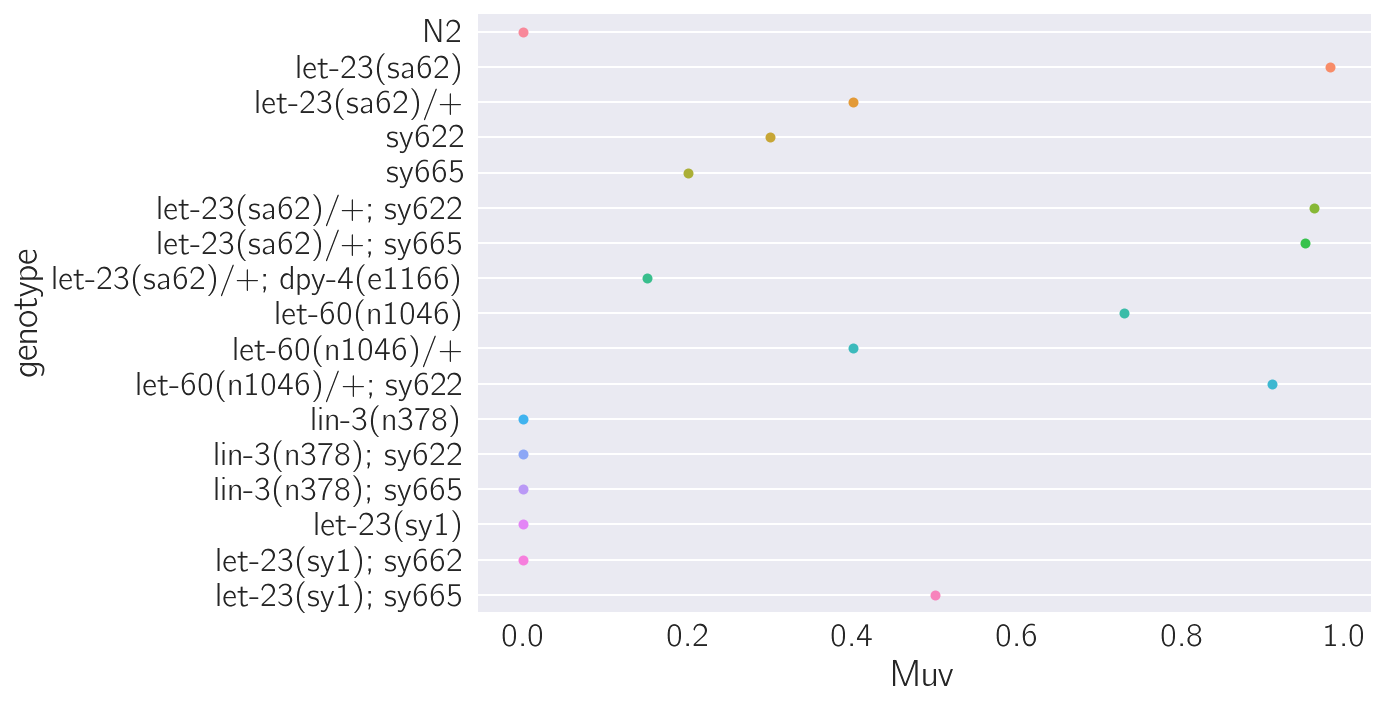

In [131]:
ax = sns.swarmplot('Muv', 'genotype', data=data)
ax.yaxis.grid(True)

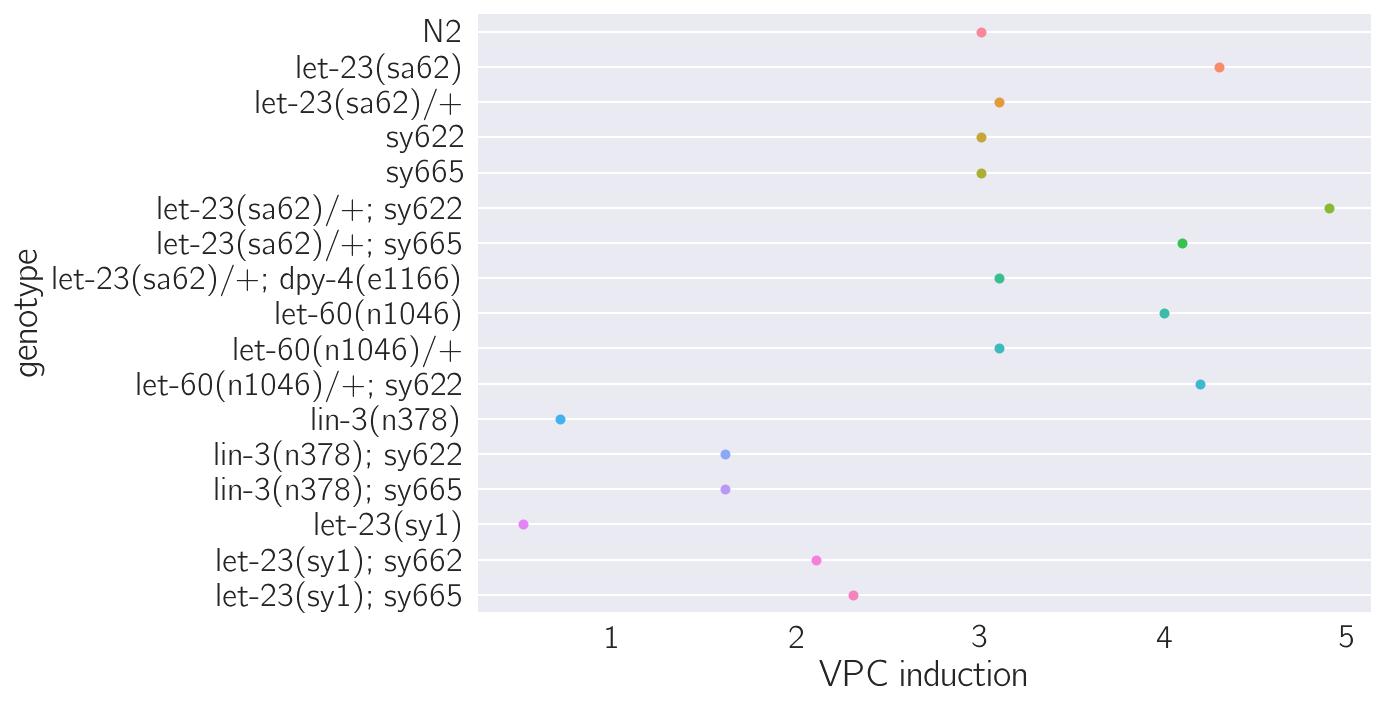

In [132]:
ax = sns.swarmplot('VPC induction', 'genotype', data=data)
ax.yaxis.grid(True)

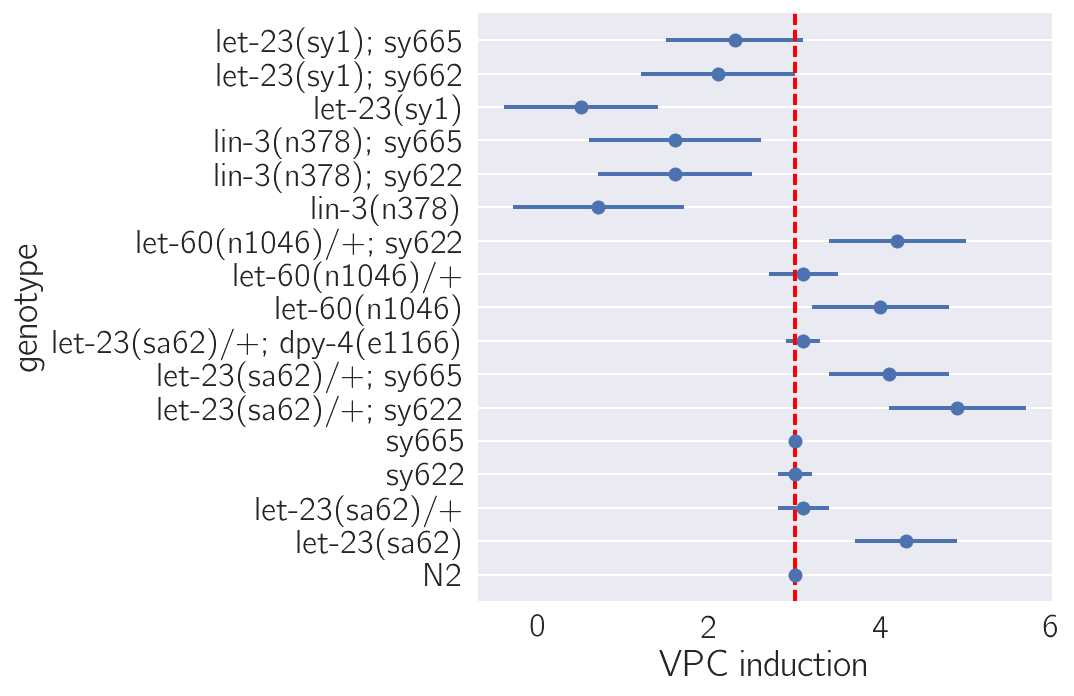

In [184]:
data['temp'] = 0
g = sns.FacetGrid(data, size=5)
g.map(plt.errorbar, 'VPC induction', 'sorted', 'temp', 'VPC error', fmt='o')
plt.yticks(data.sorted)
g.set_yticklabels(data.genotype)
# plt.xticks(rotation=90)
plt.gca().yaxis.grid(True)
plt.ylabel('genotype')
plt.axvline(3, ls='--',  color='red')

In [161]:
49/51

0.9607843137254902

In [166]:
.62*21

13.02

In [ ]:
.84*